# **Language, Computation and Cognition - FInal Project**
## **Structured Tasks**
### Lihi Kaspi (214676140) and Harel Oved (326042389)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pyreadr

In [4]:
import pandas as pd
pd.set_option("display.max_columns", None)

import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM
import math
import string
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.gam.api import GLMGam, BSplines
from statsmodels.genmod.families import Gaussian
import pyreadr
from transformers import XLMRobertaTokenizer, XLMRobertaForMaskedLM, XLMRobertaTokenizerFast
import torch
import math
from statsmodels.nonparametric.smoothers_lowess import lowess

import logging
logging.basicConfig(level=logging.DEBUG)
L = logging.getLogger(__name__)
logging.getLogger('matplotlib').setLevel(logging.WARNING)



# Structured Tasks:

In [5]:
unzip_data_path = '/content/drive/MyDrive/language_and_cognition/ia_Paragraph_ordinary'
data = pd.read_csv(f'{unzip_data_path}/ia_Paragraph_ordinary.csv')

In [ ]:
data.head()

,participant_id,TRIAL_INDEX,EYE_REPORTED,EYE_TRACKED,IA_AREA,IA_AVERAGE_FIX_PUPIL_SIZE,IA_BOTTOM,IA_DWELL_TIME,IA_DWELL_TIME_%,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_INDEX,IA_FIRST_FIXATION_PREVIOUS_FIX_IA,IA_FIRST_FIXATION_PREVIOUS_IAREAS,IA_FIRST_FIXATION_RUN_INDEX,IA_FIRST_FIXATION_TIME,IA_FIRST_FIXATION_VISITED_IA_COUNT,IA_FIRST_FIXATION_X,IA_FIRST_FIXATION_Y,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_DWELL_TIME,IA_FIRST_RUN_END_TIME,IA_FIRST_RUN_FIXATION_%,IA_FIRST_RUN_FIXATION_COUNT,IA_FIRST_RUN_LANDING_POSITION,IA_FIRST_RUN_LAUNCH_SITE,IA_FIRST_RUN_START_TIME,IA_FIRST_SACCADE_AMPLITUDE,IA_FIRST_SACCADE_ANGLE,IA_FIRST_SACCADE_END_TIME,IA_FIRST_SACCADE_INDEX,IA_FIRST_SACCADE_START_TIME,IA_FIXATION_%,IA_FIXATION_COUNT,IA_ID,IA_LABEL,IA_LAST_FIXATION_DURATION,IA_LAST_FIXATION_RUN,IA_LAST_FIXATION_TIME,IA_LAST_FIXATION_X,IA_LAST_FIXATION_Y,IA_LAST_RUN_DWELL_TIME,IA_LAST_RUN_END_TIME,IA_LAST_RUN_FIXATION_%,IA_LAST_RUN_FIXATION_COUNT,IA_LAST_RUN_LANDING_POSITION,IA_LAST_RUN_LAUNCH_SITE,IA_LAST_RUN_START_TIME,IA_LAST_SACCADE_AMPLITUDE,IA_LAST_SACCADE_ANGLE,IA_LAST_SACCADE_END_TIME,IA_LAST_SACCADE_INDEX,IA_LAST_SACCADE_START_TIME,IA_LEFT,IA_LEGAL,IA_LEGAL_IMMEDIATE,IA_MAX_FIX_PUPIL_SIZE,IA_MIN_FIX_PUPIL_SIZE,IA_REGRESSION_IN,IA_REGRESSION_IN_COUNT,IA_REGRESSION_OUT,IA_REGRESSION_OUT_COUNT,IA_REGRESSION_OUT_FULL,IA_REGRESSION_OUT_FULL_COUNT,IA_REGRESSION_PATH_DURATION,IA_RIGHT,IA_RUN_COUNT,IA_SECOND_FIXATION_DURATION,IA_SECOND_FIXATION_RUN,IA_SECOND_FIXATION_TIME,IA_SECOND_FIXATION_X,IA_SECOND_FIXATION_Y,IA_SECOND_RUN_DWELL_TIME,IA_SECOND_RUN_END_TIME,IA_SECOND_RUN_FIXATION_%,IA_SECOND_RUN_FIXATION_COUNT,IA_SECOND_RUN_LANDING_POSITION,IA_SECOND_RUN_LAUNCH_SITE,IA_SECOND_RUN_START_TIME,IA_SELECTIVE_REGRESSION_PATH_DURATION,IA_SKIP,IA_SPILLOVER,IA_THIRD_FIXATION_DURATION,IA_THIRD_FIXATION_RUN,IA_THIRD_FIXATION_TIME,IA_THIRD_FIXATION_X,IA_THIRD_FIXATION_Y,IA_THIRD_RUN_DWELL_TIME,IA_THIRD_RUN_END_TIME,IA_THIRD_RUN_FIXATION_%,IA_THIRD_RUN_FIXATION_COUNT,IA_THIRD_RUN_LANDING_POSITION,IA_THIRD_RUN_LAUNCH_SITE,IA_THIRD_RUN_START_TIME,IA_TOP,INTEREST_AREA_FIXATION_SEQUENCE,IP_END_TIME,IP_START_TIME,TRIAL_DWELL_TIME,TRIAL_FIXATION_COUNT,TRIAL_IA_COUNT,TRIAL_LABEL,TRIAL_START_TIME,TRIAL_TOTAL_VISITED_IA_COUNT,ANSWER_LOCATIONS,ANSWER_PRESS_NUMBER,ANSWER_RT,CONFIRM_FINAL_ANSWER_RT,EXPERIMENT_DURATION,selected_answer_position,NUM_RECALIBRATIONS,PARAGRAPH_RT,PREVIEW_QUESTION_RT,QUESTION_RT,SELECT_FINAL_ANSWER_RT,SELECT_TO_CONFIRM_RT,TOP_LEFT,answer_1,answers_order,article_id,article_index,article_title,critical_span_indices,answer_2,article_batch,answer_3,correct_answer_position,answer_4,distractor_span_indices,question_preview,difficulty_level,list_number,paragraph_id,practice_trial,onestopqa_question_id,question,repeated_reading_trial,trial_index,auxiliary_span_type,same_critical_span,word_length,paragraph,text_onscreen_version,text_spacing_version,word_length_no_punctuation,wordfreq_frequency,subtlex_frequency,gpt2_surprisal,universal_pos,dependency_relation,morphological_features,entity_type,is_content_word,ptb_pos,head_word_index,left_dependents_count,right_dependents_count,distance_to_head,selected_answer
0,l59_485,1,RIGHT,Right,16872.0,668.89,264,2171,0.1434,311,1,.,.,1,9754,0,367.40,209.00,1,1048,11026,0.0506,4,9.40,.,9754,.,.,.,.,.,0.1139,9,1,Leading,194,5,15514,463.10,197.80,194,15707,0.0127,1,105.10,-388.60,15514,4.66,-172.86,15513,19,15477,358,1,1,714.00,615.00,1,4,0,0,0,0,1048,510,5,208,1,10085,458.40,186.80,195,11563,0.0127,1,54.70,-205.10,11369,1048,0,292,261,1,10307,406.10,198.20,176,12855,0.0127,1,107.10,-218.30,12680,153,"[1, 2, 1, 3, 9, 2, 1, 4, 10, 13, 3, 1, 2, 3, 1...",1890959,1871649,15143.0,79,128,Trial: 1,1861895,52,"[(930,414), (180,756), (1680,756), (930,1098)]",1,10086,11059,4,0,0,19307,0,4571,10086,972,"(368,186)","By 2050, nine billion people will not have eno...","['B', 'A', 'C', 'D']",0,0,Food Shortages Could Force World into Vegetari...,"[(80,128)]",There will not be sufficient water to grow eno...,2,"By 2050, a

### Surprisal Extraction:

#### Pyhia-70M surprisals:

In [5]:
model_name = "EleutherAI/pythia-70m"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/166M [00:00<?, ?B/s]

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (final_layer_norm): LayerNorm((512,), eps=1e-05, elementwise

In [6]:
def get_words_with_offsets(paragraph):
    words = []
    offset = 0
    for w in paragraph.split():
        # Find the exact start position of w from the current offset
        start = paragraph.find(w, offset)
        end = start + len(w)
        # Keep the word as is, including punctuation
        words.append((w, start, end))
        offset = end
    return words

def compute_surprisal_per_word(paragraph):
    encoding = tokenizer(paragraph, return_tensors="pt", return_offsets_mapping=True)
    input_ids = encoding["input_ids"].to(device)
    offsets = encoding["offset_mapping"][0]  # (num_tokens, 2)

    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits
        log_probs = torch.log_softmax(logits, dim=-1)

    token_surprisals = []
    for i in range(1, input_ids.shape[1]):
        token_id = input_ids[0, i].item()
        log_prob = log_probs[0, i-1, token_id]
        surprisal = -log_prob.item() / math.log(10)
        token_surprisals.append(surprisal)

    words = get_words_with_offsets(paragraph)

    # Now assign tokens to words by checking token offsets
    word_surprisals = []
    token_idx = 0
    num_tokens = len(token_surprisals)

    for word, w_start, w_end in words:
        # sum surprisals of tokens whose offsets fall inside this word span
        surprisal_sum = 0.0
        while token_idx < num_tokens:
            t_start, t_end = offsets[token_idx + 1]  # +1 because first token is special [CLS] etc.
            if t_start >= w_end:
                # token starts after word ends, break
                break
            if t_end <= w_start:
                # token ends before word starts, skip token
                token_idx += 1
                continue
            # token overlaps word
            surprisal_sum += token_surprisals[token_idx]
            token_idx += 1
        word_surprisals.append((word, surprisal_sum))

    return word_surprisals

In [7]:
pythia_surprisal = data[['article_batch', 'article_id', 'paragraph_id', 'paragraph', 'difficulty_level']].drop_duplicates()
pythia_surprisal['surprisal_list'] = pythia_surprisal['paragraph'].apply(compute_surprisal_per_word)

In [8]:
print(pythia_surprisal.loc[0, 'surprisal_list'])

[('Leading', 0.8719198666662737), ('water', 3.6580667086157947), ('scientists', 2.5480941965251187), ('have', 1.6508952321784245), ('issued', 3.08525392516987), ('one', 2.8749915234408445), ('of', 0.7905735736187133), ('the', 0.19531910525205204), ('sternest', 5.618931708217236), ('warnings', 2.262612762222229), ('yet', 2.663957926943578), ('about', 2.233116633214448), ('global', 2.7530025516542183), ('food', 3.0317677161602186), ('supplies,', 2.6492114155977866), ('saying', 2.3303095394895377), ('that', 0.48998555415067685), ('the', 0.7664906147625045), ("world's", 2.2154005353547217), ('population', 1.957576653273592), ('may', 2.3580646818118707), ('have', 1.0049531386093136), ('to', 1.169269189093702), ('switch', 3.142751630918407), ('almost', 4.008195346029944), ('completely', 1.353733427705519), ('to', 0.4281951782753431), ('a', 1.1996072333351797), ('vegetarian', 3.4256471605298264), ('diet', 0.21774059911749719), ('by', 2.0037580491105906), ('2050', 1.7877900952177987), ('to', 1

In [9]:
pythia_surprisal = pythia_surprisal.explode('surprisal_list', ignore_index=True)
pythia_surprisal[['IA_LABEL', 'pythia_surprisal']] = pd.DataFrame(pythia_surprisal['surprisal_list'].tolist(), index=pythia_surprisal.index)
pythia_surprisal['IA_ID'] = pythia_surprisal.groupby('paragraph').cumcount() + 1
pythia_surprisal.head(10)

,article_batch,article_id,paragraph_id,paragraph,difficulty_level,surprisal_list,IA_LABEL,pythia_surprisal,IA_ID
0,2,0,1,Leading water scientists have issued one of th...,Adv,"(Leading, 0.8719198666662737)",Leading,0.871920,1
1,2,0,1,Leading water scientists have issued one of th...,Adv,"(water, 3.6580667086157947)",water,3.658067,2
2,2,0,1,Leading water scientists have issued one of th...,Adv,"(scientists, 2.5480941965251187)",scientists,2.548094,3
3,2,0,1,Leading water scientists have issued one of th...,Adv,"(have, 1.6508952321784245)",have,1.650895,4
4,2,0,1,Leading water scientists have issued one of th...,Adv,"(issued, 3.08525392516987)",issued,3.085254,5
5,2,0,1,Leading water scientists have issued one of th...,Adv,"(one, 2.8749915234408445)",one,2.874992,6
6,2,0,1,Leading water scientists have issued one of th...,Adv,"(of, 0.7905735736187133)",of,0.790574,7
7,2,0,1,Leading water scientists have issued one of th...,Adv,"(the, 0.19531910525205204)",the,0.195319,8
8,2,0,1,Leading water scientists have issued one of th...,Adv,"(sternest, 5.618931708217236)",sternest,5.618932,9
9,2,0,1,Leading water scientists have issued one of th...,Adv,"(warnings, 2.262612762222229)",warnings,2.262613,10


In [10]:
pythia_surprisal.to_csv("/content/drive/MyDrive/language_and_cognition/pythia_surprisals.csv")

#### merging Pythia-70M and KenLM surprisals:

In [14]:
kenlm_surprisal = pd.read_csv("/content/drive/MyDrive/language_and_cognition/is_Paragraph_ordinary_with_kenlm/is_Paragraph_ordinary_with_kenlm.csv")
pythia_surprisal = pd.read_csv("/content/drive/MyDrive/language_and_cognition/pythia_surprisals.csv")

In [15]:
pythia_surprisal.head()

,Unnamed: 0,article_batch,article_id,paragraph_id,paragraph,difficulty_level,surprisal_list,IA_LABEL,pythia_surprisal,IA_ID
0,0,2,0,1,Leading water scientists have issued one of th...,Adv,"('Leading', 0.8719198666662737)",Leading,0.871920,1
1,1,2,0,1,Leading water scientists have issued one of th...,Adv,"('water', 3.6580667086157947)",water,3.658067,2
2,2,2,0,1,Leading water scientists have issued one of th...,Adv,"('scientists', 2.5480941965251187)",scientists,2.548094,3
3,3,2,0,1,Leading water scientists have issued one of th...,Adv,"('have', 1.6508952321784245)",have,1.650895,4
4,4,2,0,1,Leading water scientists have issued one of th...,Adv,"('issued', 3.08525392516987)",issued,3.085254,5


In [16]:
kenlm_surprisal.head()

,participant_id,TRIAL_INDEX,EYE_REPORTED,EYE_TRACKED,IA_AREA,IA_AVERAGE_FIX_PUPIL_SIZE,IA_BOTTOM,IA_DWELL_TIME,IA_DWELL_TIME_%,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_INDEX,IA_FIRST_FIXATION_PREVIOUS_FIX_IA,IA_FIRST_FIXATION_PREVIOUS_IAREAS,IA_FIRST_FIXATION_RUN_INDEX,IA_FIRST_FIXATION_TIME,IA_FIRST_FIXATION_VISITED_IA_COUNT,IA_FIRST_FIXATION_X,IA_FIRST_FIXATION_Y,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_DWELL_TIME,IA_FIRST_RUN_END_TIME,IA_FIRST_RUN_FIXATION_%,IA_FIRST_RUN_FIXATION_COUNT,IA_FIRST_RUN_LANDING_POSITION,IA_FIRST_RUN_LAUNCH_SITE,IA_FIRST_RUN_START_TIME,IA_FIRST_SACCADE_AMPLITUDE,IA_FIRST_SACCADE_ANGLE,IA_FIRST_SACCADE_END_TIME,IA_FIRST_SACCADE_INDEX,IA_FIRST_SACCADE_START_TIME,IA_FIXATION_%,IA_FIXATION_COUNT,IA_ID,IA_LABEL,IA_LAST_FIXATION_DURATION,IA_LAST_FIXATION_RUN,IA_LAST_FIXATION_TIME,IA_LAST_FIXATION_X,IA_LAST_FIXATION_Y,IA_LAST_RUN_DWELL_TIME,IA_LAST_RUN_END_TIME,IA_LAST_RUN_FIXATION_%,IA_LAST_RUN_FIXATION_COUNT,IA_LAST_RUN_LANDING_POSITION,IA_LAST_RUN_LAUNCH_SITE,IA_LAST_RUN_START_TIME,IA_LAST_SACCADE_AMPLITUDE,IA_LAST_SACCADE_ANGLE,IA_LAST_SACCADE_END_TIME,IA_LAST_SACCADE_INDEX,IA_LAST_SACCADE_START_TIME,IA_LEFT,IA_LEGAL,IA_LEGAL_IMMEDIATE,IA_MAX_FIX_PUPIL_SIZE,IA_MIN_FIX_PUPIL_SIZE,IA_REGRESSION_IN,IA_REGRESSION_IN_COUNT,IA_REGRESSION_OUT,IA_REGRESSION_OUT_COUNT,IA_REGRESSION_OUT_FULL,IA_REGRESSION_OUT_FULL_COUNT,IA_REGRESSION_PATH_DURATION,IA_RIGHT,IA_RUN_COUNT,IA_SECOND_FIXATION_DURATION,IA_SECOND_FIXATION_RUN,IA_SECOND_FIXATION_TIME,IA_SECOND_FIXATION_X,IA_SECOND_FIXATION_Y,IA_SECOND_RUN_DWELL_TIME,IA_SECOND_RUN_END_TIME,IA_SECOND_RUN_FIXATION_%,IA_SECOND_RUN_FIXATION_COUNT,IA_SECOND_RUN_LANDING_POSITION,IA_SECOND_RUN_LAUNCH_SITE,IA_SECOND_RUN_START_TIME,IA_SELECTIVE_REGRESSION_PATH_DURATION,IA_SKIP,IA_SPILLOVER,IA_THIRD_FIXATION_DURATION,IA_THIRD_FIXATION_RUN,IA_THIRD_FIXATION_TIME,IA_THIRD_FIXATION_X,IA_THIRD_FIXATION_Y,IA_THIRD_RUN_DWELL_TIME,IA_THIRD_RUN_END_TIME,IA_THIRD_RUN_FIXATION_%,IA_THIRD_RUN_FIXATION_COUNT,IA_THIRD_RUN_LANDING_POSITION,IA_THIRD_RUN_LAUNCH_SITE,IA_THIRD_RUN_START_TIME,IA_TOP,INTEREST_AREA_FIXATION_SEQUENCE,IP_END_TIME,IP_START_TIME,TRIAL_DWELL_TIME,TRIAL_FIXATION_COUNT,TRIAL_IA_COUNT,TRIAL_LABEL,TRIAL_START_TIME,TRIAL_TOTAL_VISITED_IA_COUNT,ANSWER_LOCATIONS,ANSWER_PRESS_NUMBER,ANSWER_RT,CONFIRM_FINAL_ANSWER_RT,EXPERIMENT_DURATION,selected_answer_position,NUM_RECALIBRATIONS,PARAGRAPH_RT,PREVIEW_QUESTION_RT,QUESTION_RT,SELECT_FINAL_ANSWER_RT,SELECT_TO_CONFIRM_RT,TOP_LEFT,answer_1,answers_order,article_id,article_index,article_title,critical_span_indices,answer_2,article_batch,answer_3,correct_answer_position,answer_4,distractor_span_indices,question_preview,difficulty_level,list_number,paragraph_id,practice_trial,onestopqa_question_id,question,repeated_reading_trial,trial_index,auxiliary_span_type,same_critical_span,word_length,paragraph,text_onscreen_version,text_spacing_version,word_length_no_punctuation,wordfreq_frequency,subtlex_frequency,gpt2_surprisal,universal_pos,dependency_relation,morphological_features,entity_type,is_content_word,ptb_pos,head_word_index,left_dependents_count,right_dependents_count,distance_to_head,selected_answer,kenlm_surprisal
0,l59_485,1,RIGHT,Right,16872.0,668.89,264,2171,0.1434,311,1,.,.,1,9754,0,367.40,209.00,1,1048,11026,0.0506,4,9.40,.,9754,.,.,.,.,.,0.1139,9,1,Leading,194,5,15514,463.10,197.80,194,15707,0.0127,1,105.10,-388.60,15514,4.66,-172.86,15513,19,15477,358,1,1,714.00,615.00,1,4,0,0,0,0,1048,510,5,208,1,10085,458.40,186.80,195,11563,0.0127,1,54.70,-205.10,11369,1048,0,292,261,1,10307,406.10,198.20,176,12855,0.0127,1,107.10,-218.30,12680,153,"[1, 2, 1, 3, 9, 2, 1, 4, 10, 13, 3, 1, 2, 3, 1...",1890959,1871649,15143.0,79,128,Trial: 1,1861895,52,"[(930,414), (180,756), (1680,756), (930,1098)]",1,10086,11059,4,0,0,19307,0,4571,10086,972,"(368,186)","By 2050, nine billion people will not have eno...","['B', 'A', 'C', 'D']",0,0,Food Shortages Could Force World into Vegetari...,"[(80,128)]",There will not be sufficient water to grow eno.

In [17]:
kenlm_surprisals = kenlm_surprisal[['article_batch', 'article_id', 'paragraph_id', 'IA_ID', 'difficulty_level',
                                    'kenlm_surprisal', 'IA_DWELL_TIME', 'participant_id']]

full_pythia_surprisal = data[['article_batch', 'article_id', 'paragraph_id', 'IA_ID', 'difficulty_level', 'IA_DWELL_TIME',
                              'IA_FIRST_FIXATION_DURATION', 'IA_FIRST_RUN_DWELL_TIME', 'participant_id', 'wordfreq_frequency',
                              'word_length_no_punctuation']].merge(pythia_surprisal,
                              on=['article_batch', 'article_id', 'paragraph_id', 'IA_ID', 'difficulty_level'], how='inner')

data_with_suprisals = kenlm_surprisals.merge(full_pythia_surprisal, on=['article_batch', 'article_id', 'paragraph_id', 'IA_ID',
                                                                        'difficulty_level', 'participant_id'], how='inner')

In [18]:
data_with_suprisals.head()

,article_batch,article_id,paragraph_id,IA_ID,difficulty_level,kenlm_surprisal,IA_DWELL_TIME_x,participant_id,IA_DWELL_TIME_y,IA_FIRST_FIXATION_DURATION,IA_FIRST_RUN_DWELL_TIME,wordfreq_frequency,word_length_no_punctuation,Unnamed: 0,paragraph,surprisal_list,IA_LABEL,pythia_surprisal
0,2,0,1,1,Adv,3.766384,2171,l59_485,2171,311,1048,13.287712,7,0,Leading water scientists have issued one of th...,"('Leading', 0.8719198666662737)",Leading,0.871920
1,2,0,1,2,Adv,4.141048,876,l59_485,876,292,292,11.560881,5,1,Leading water scientists have issued one of th...,"('water', 3.6580667086157947)",water,3.658067
2,2,0,1,3,Adv,5.011511,640,l59_485,640,191,191,14.949716,10,2,Leading water scientists have issued one of th...,"('scientists', 2.5480941965251187)",scientists,2.548094
3,2,0,1,4,Adv,1.644395,586,l59_485,586,271,271,7.606825,4,3,Leading water scientists have issued one of th...,"('have', 1.6508952321784245)",have,1.650895
4,2,0,1,5,Adv,3.669834,0,l59_485,0,.,.,14.184718,6,4,Leading water scientists have issued one of th...,"('issued', 3.08525392516987)",issued,3.085254


In [6]:
# add the reading time of the next word to each row
group_cols = ['article_batch', 'article_id', 'paragraph_id', 'difficulty_level', 'participant_id']
next_dwell = (
    data_with_suprisals[group_cols + ['IA_ID', 'IA_DWELL_TIME']]
    .copy()
    .rename(columns={'IA_DWELL_TIME': 'NEXT_IA_DWELL_TIME'})
)
next_dwell['IA_ID'] -= 1

# Merge on group_cols + IA_ID to bring the previous dwell time to the current row
data_with_suprisals = data_with_suprisals.merge(next_dwell, on=group_cols + ['IA_ID'], how='left')
del next_dwell

In [19]:
data_with_suprisals.to_csv("/content/drive/MyDrive/language_and_cognition/data_with_suprisals.csv")

In [20]:
len(data_with_suprisals)

1125613

### Task 1:

In [5]:
data_with_suprisals = pd.read_csv("/content/drive/MyDrive/language_and_cognition/data_with_suprisals.csv")
data_with_suprisals = data_with_suprisals.rename(columns={'IA_DWELL_TIME_x': 'IA_DWELL_TIME'})

#### Task 1.1:

In [20]:
rt_surprisals = data_with_suprisals[['IA_DWELL_TIME', 'pythia_surprisal', 'kenlm_surprisal']]

In [21]:
rt_surprisals.head()

,IA_DWELL_TIME,pythia_surprisal,kenlm_surprisal
0,2171,0.871920,3.766384
1,876,3.658067,4.141048
2,640,2.548094,5.011511
3,586,1.650895,1.644395
4,0,3.085254,3.669834


In [22]:
avg_reading_time = data_with_suprisals.groupby(['article_batch', 'article_id', 'paragraph_id', 'IA_ID', 'difficulty_level', 'kenlm_surprisal', 'pythia_surprisal'])['IA_DWELL_TIME'].mean()
avg_reading_time = avg_reading_time.reset_index()

In [23]:
avg_reading_time.head()

,article_batch,article_id,paragraph_id,IA_ID,difficulty_level,kenlm_surprisal,pythia_surprisal,IA_DWELL_TIME
0,1,1,1,1,Adv,5.225467,5.562026,499.133333
1,1,1,1,1,Ele,2.753891,0.000000,178.633333
2,1,1,1,2,Adv,1.222441,1.497989,73.066667
3,1,1,1,2,Ele,3.245022,4.534030,92.500000
4,1,1,1,3,Adv,3.407573,3.021328,155.333333


In [24]:
X = avg_reading_time['IA_DWELL_TIME']
Y = avg_reading_time['pythia_surprisal']
X = sm.add_constant(X)
pythia_model = sm.OLS(Y, X).fit()
print(pythia_model.summary())

                            OLS Regression Results                            
Dep. Variable:       pythia_surprisal   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                 1.607e+04
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:18:06   Log-Likelihood:                -68267.
No. Observations:               38335   AIC:                         1.365e+05
Df Residuals:                   38333   BIC:                         1.366e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6783      0.014     49.866

In [25]:
X = avg_reading_time['IA_DWELL_TIME']
Y = avg_reading_time['kenlm_surprisal']
X = sm.add_constant(X)
kenlm_model = sm.OLS(Y, X).fit()
print(kenlm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        kenlm_surprisal   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     7585.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:18:06   Log-Likelihood:                -82684.
No. Observations:               38335   AIC:                         1.654e+05
Df Residuals:                   38333   BIC:                         1.654e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0005      0.020    100.968

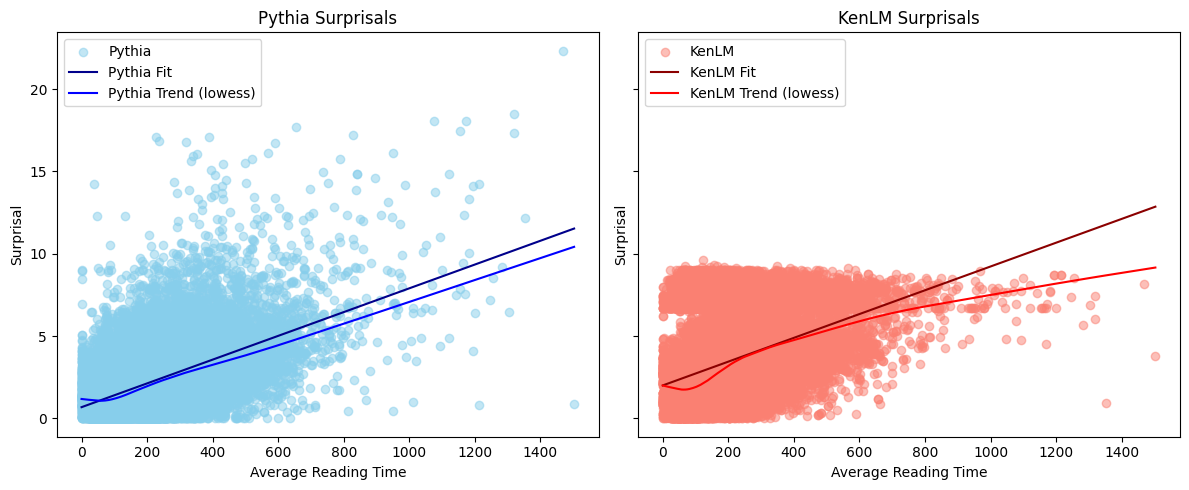

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# --- Pythia subplot ---
X_pythia = sm.add_constant(avg_reading_time['IA_DWELL_TIME'])
Y_pythia = avg_reading_time['pythia_surprisal']
pythia_model = sm.OLS(Y_pythia, X_pythia).fit()

# Scatter
ax[0].scatter(avg_reading_time['IA_DWELL_TIME'], Y_pythia, color='skyblue', alpha=0.5, label='Pythia')

# Model prediction (OLS fit)
y_pred_pythia = pythia_model.predict(X_pythia)
x_sorted, y_sorted = zip(*sorted(zip(avg_reading_time['IA_DWELL_TIME'], y_pred_pythia)))
ax[0].plot(x_sorted, y_sorted, color='darkblue', label='Pythia Fit')

# LOWESS trend line
trend_pythia = lowess(Y_pythia, avg_reading_time['IA_DWELL_TIME'], frac=0.3)
ax[0].plot(trend_pythia[:, 0], trend_pythia[:, 1], color='blue', label='Pythia Trend (lowess)')

ax[0].set_title('Pythia Surprisals')

# --- KenLM subplot ---
X_kenlm = sm.add_constant(avg_reading_time['IA_DWELL_TIME'])
Y_kenlm = avg_reading_time['kenlm_surprisal']
kenlm_model = sm.OLS(Y_kenlm, X_kenlm).fit()

# Scatter
ax[1].scatter(avg_reading_time['IA_DWELL_TIME'], Y_kenlm, color='salmon', alpha=0.5, label='KenLM')

# Model prediction (OLS fit)
y_pred_kenlm = kenlm_model.predict(X_kenlm)
x_sorted, y_sorted = zip(*sorted(zip(avg_reading_time['IA_DWELL_TIME'], y_pred_kenlm)))
ax[1].plot(x_sorted, y_sorted, color='darkred', label='KenLM Fit')

# LOWESS trend line
trend_kenlm = lowess(Y_kenlm, avg_reading_time['IA_DWELL_TIME'], frac=0.3)
ax[1].plot(trend_kenlm[:, 0], trend_kenlm[:, 1], color='red', label='KenLM Trend (lowess)')

ax[1].set_title('KenLM Surprisals')

# --- Common labels and legend ---
for a in ax:
    a.set_xlabel('Average Reading Time')
    a.set_ylabel('Surprisal')
    a.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### Task 1.2:

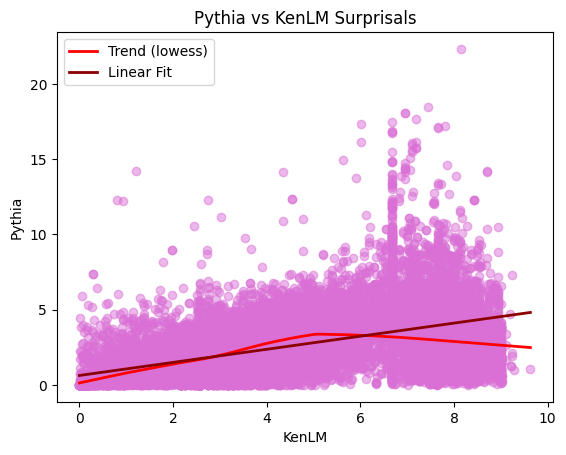

In [27]:
# Scatter plot
plt.scatter(avg_reading_time['kenlm_surprisal'], avg_reading_time['pythia_surprisal'],
            color='orchid', alpha=0.5)

# LOWESS trend line
trend = lowess(avg_reading_time['pythia_surprisal'], avg_reading_time['kenlm_surprisal'], frac=0.3)
plt.plot(trend[:, 0], trend[:, 1], color='red', linewidth=2, label='Trend (lowess)')

# Optional: Linear fit line
coeffs = np.polyfit(avg_reading_time['kenlm_surprisal'], avg_reading_time['pythia_surprisal'], 1)
linear_fit = np.poly1d(coeffs)
x_sorted, y_sorted = zip(*sorted(zip(avg_reading_time['kenlm_surprisal'], linear_fit(avg_reading_time['kenlm_surprisal']))))
plt.plot(x_sorted, y_sorted, color='darkred', linewidth=2, label='Linear Fit')

plt.xlabel('KenLM')
plt.ylabel('Pythia')
plt.title('Pythia vs KenLM Surprisals')
plt.legend()
plt.show()

#### Task 1.3:

In [28]:
kenlm_max = avg_reading_time.sort_values(by='kenlm_surprisal', ascending=False)
kenlm_max.head()

,article_batch,article_id,paragraph_id,IA_ID,difficulty_level,kenlm_surprisal,pythia_surprisal,IA_DWELL_TIME
35580,3,8,6,23,Adv,9.629442,1.073381,121.366667
21,1,1,1,11,Ele,9.287105,0.966069,155.966667
10326,1,9,6,121,Adv,9.245390,1.947519,68.866667
10329,1,9,6,123,Ele,9.245390,2.090265,165.966667
14942,2,2,5,111,Adv,9.233449,7.338454,347.724138


In [29]:
most_different = kenlm_max[:4]
most_different['paragraph_index'] = most_different.apply(
    lambda row: (row['article_batch'], row['article_id'], row['paragraph_id'], row['IA_ID'], row['difficulty_level']),
    axis=1 # Apply the function row-wise
)
most_different

/tmp/ipython-input-2900811744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_different['paragraph_index'] = most_different.apply(


,article_batch,article_id,paragraph_id,IA_ID,difficulty_level,kenlm_surprisal,pythia_surprisal,IA_DWELL_TIME,paragraph_index
35580,3,8,6,23,Adv,9.629442,1.073381,121.366667,"(3, 8, 6, 23, Adv)"
21,1,1,1,11,Ele,9.287105,0.966069,155.966667,"(1, 1, 1, 11, Ele)"
10326,1,9,6,121,Adv,9.245390,1.947519,68.866667,"(1, 9, 6, 121, Adv)"
10329,1,9,6,123,Ele,9.245390,2.090265,165.966667,"(1, 9, 6, 123, Ele)"


In [30]:
paragraphs = []
for row in most_different.itertuples():
  article_batch, article_id, paragraph_id, IA_ID, difficulty_level = row.paragraph_index
  curr = data[(data['article_batch'] == int(article_batch)) & (data['article_id'] == int(article_id))
    & (data['paragraph_id'] == int(paragraph_id)) & (data['IA_ID'] == int(IA_ID)) & (data['difficulty_level'] == difficulty_level)]
  paragraph = curr['paragraph'].drop_duplicates().to_list()[0]
  word = curr['IA_LABEL'].to_list()[0]
  paragraphs.append((paragraph, word))

In [31]:
paragraphs

[("The ultranationalist leader of Russia's Liberal Democrat party, Vladimir Zhirinovsky, said it was not a meteorite but military action by the United States, echoing much of the speculation voiced on amateur film footage. “It's not a meteorite falling – it's a test of new American weapons,” Zhirinovsky said. Some were quick to take advantage of the confusion. Enterprising people were offering lumps of meteorite for sale through internet sites within a few hours of the impact. President Vladimir Putin and the Prime Minister, Dmitry Medvedev, were informed about the incident, and Putin convened a meeting with the head of the Emergency Situations Ministry. “It's proof that not only are economies vulnerable but the whole planet,” Medvedev said at an economic forum in Siberia.",
  'States,'),
 ('A car with a maximum speed of 25 miles per hour, two seats and no pedals or steering wheel does not sound very interesting. But Google, in the US, shocked the car and taxi industries when it unveil

In [32]:
avg_reading_time["surp_diff"] = avg_reading_time["pythia_surprisal"] - avg_reading_time["kenlm_surprisal"]

In [33]:
pythia_max = avg_reading_time.sort_values(by='surp_diff', ascending=False)
pythia_max.head()

,article_batch,article_id,paragraph_id,IA_ID,difficulty_level,kenlm_surprisal,pythia_surprisal,IA_DWELL_TIME,surp_diff
16805,2,4,5,12,Adv,8.148583,22.331496,1468.366667,14.182912
33267,3,7,4,97,Adv,1.205532,14.207349,37.647059,13.001818
33342,3,7,4,112,Adv,0.799722,12.292904,133.470588,11.493182
16630,2,4,4,14,Adv,6.016050,17.344966,1318.333333,11.328916
16634,2,4,4,16,Adv,0.940417,12.198442,1352.233333,11.258025


In [34]:
most_different = pythia_max[:4]
most_different['paragraph_index'] = most_different.apply(
    lambda row: (row['article_batch'], row['article_id'], row['paragraph_id'], row['IA_ID'], row['difficulty_level']),
    axis=1 # Apply the function row-wise
)
most_different

/tmp/ipython-input-3029770169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_different['paragraph_index'] = most_different.apply(


,article_batch,article_id,paragraph_id,IA_ID,difficulty_level,kenlm_surprisal,pythia_surprisal,IA_DWELL_TIME,surp_diff,paragraph_index
16805,2,4,5,12,Adv,8.148583,22.331496,1468.366667,14.182912,"(2, 4, 5, 12, Adv)"
33267,3,7,4,97,Adv,1.205532,14.207349,37.647059,13.001818,"(3, 7, 4, 97, Adv)"
33342,3,7,4,112,Adv,0.799722,12.292904,133.470588,11.493182,"(3, 7, 4, 112, Adv)"
16630,2,4,4,14,Adv,6.016050,17.344966,1318.333333,11.328916,"(2, 4, 4, 14, Adv)"


In [35]:
paragraphs = []
for row in most_different.itertuples():
  article_batch, article_id, paragraph_id, IA_ID, difficulty_level = row.paragraph_index
  curr = data[(data['article_batch'] == int(article_batch)) & (data['article_id'] == int(article_id))
    & (data['paragraph_id'] == int(paragraph_id)) & (data['IA_ID'] == int(IA_ID)) & (data['difficulty_level'] == difficulty_level)]
  paragraph = curr['paragraph'].drop_duplicates().to_list()[0]
  word = curr['IA_LABEL'].to_list()[0]
  paragraphs.append((paragraph, word))

In [36]:
paragraphs

[('The Japanese team is believed to be considering three names for ununtrium: japonium, rikenium and nishinarium, after the Nishina Center for Accelerator-Based Science, where the element was found. “They will have been thinking about it for a while already,” said Polly Arnold, professor of chemistry at Edinburgh University. “This is painstaking work. All this trying to understand Mother Nature helps us with our models and with understanding radioactive decay. If we understand it better, hopefully we can do better at dealing with nuclear waste and things that are important in the real world. It also leads to fantastic technological advances in building the equipment to make these observations.”',
  'ununtrium:'),
 ('Going out with friends was problematic – no American films, no Belgian beer, no sushi or pizza. Staying home, with no sofa for the first few months and no television, meant listening to crooner Michel Sardou and reading French novels. French wine was, of course, allowed and

#### Task 1.4:

In [8]:
data_with_suprisals['pythia_probs'] = data_with_suprisals.apply(lambda row: pow(10, -row['pythia_surprisal']), axis=1)
data_with_suprisals['kenlm_probs'] = data_with_suprisals.apply(lambda row: pow(10, -row['kenlm_surprisal']), axis=1)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


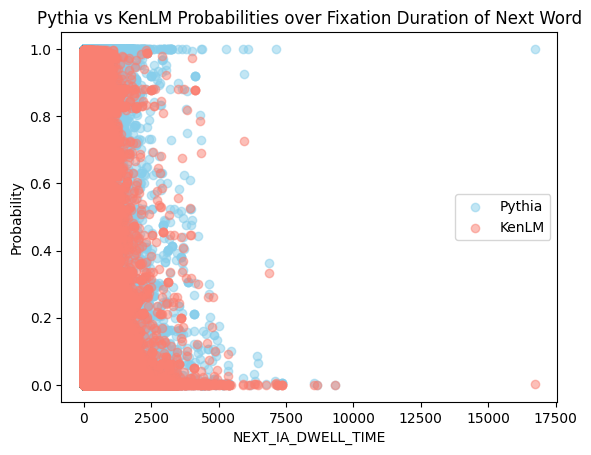

In [9]:
plt.scatter(data_with_suprisals['NEXT_IA_DWELL_TIME'], data_with_suprisals['pythia_probs'], label='Pythia', color='skyblue', alpha=0.5)
plt.scatter(data_with_suprisals['NEXT_IA_DWELL_TIME'], data_with_suprisals['kenlm_probs'], label='KenLM', color='salmon', alpha=0.5)
plt.xlabel('NEXT_IA_DWELL_TIME')
plt.ylabel('Probability')
plt.title('Pythia vs KenLM Probabilities over Fixation Duration of Next Word')
plt.legend()
plt.show()

In [10]:
avg_next_reading_time = data_with_suprisals.groupby(['article_batch', 'article_id', 'paragraph_id', 'IA_ID', 'difficulty_level', 'kenlm_surprisal', 'pythia_surprisal', 'pythia_probs', 'kenlm_probs'])['NEXT_IA_DWELL_TIME'].mean()

In [11]:
avg_next_reading_time = avg_next_reading_time.reset_index()

In [12]:
avg_next_reading_time

,article_batch,article_id,paragraph_id,IA_ID,difficulty_level,kenlm_surprisal,pythia_surprisal,pythia_probs,kenlm_probs,NEXT_IA_DWELL_TIME
0,1,1,1,1,Adv,5.225467,5.562026,0.000003,5.950217e-06,73.066667
1,1,1,1,1,Ele,2.753891,0.000000,1.000000,1.762418e-03,92.500000
2,1,1,1,2,Adv,1.222441,1.497989,0.031770,5.991826e-02,155.333333
3,1,1,1,2,Ele,3.245022,4.534030,0.000029,5.688244e-04,227.166667
4,1,1,1,3,Adv,3.407573,3.021328,0.000952,3.912256e-04,285.933333
...,...,...,...,...,...,...,...,...,...,...
38330,3,10,6,83,Adv,8.452630,1.488487,0.032472,3.526712e-09,100.500000
38331,3,10,6,83,Ele,3.430226,1.362409,0.043410,3.713419e-04,144.833333
38332,3,10,6,84,Adv,3.430226,1.290938,0.051175,3.713419e-04,131.600000
38333,3,10,6,84,Ele,7.477730,0.418996,0.381069,3.328666e-08,NaN


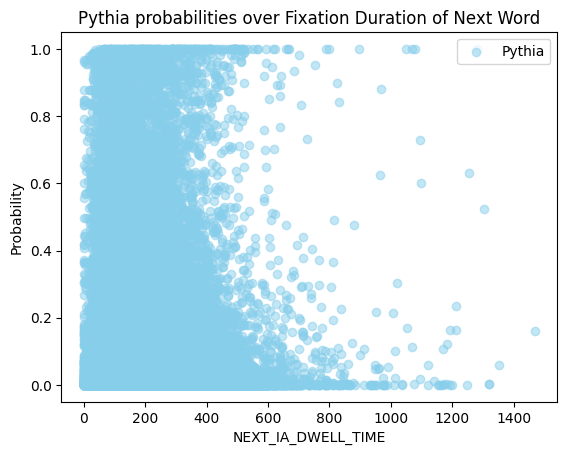

In [13]:
plt.scatter(avg_next_reading_time['NEXT_IA_DWELL_TIME'], avg_next_reading_time['pythia_probs'], label='Pythia', color='skyblue', alpha=0.5)
plt.xlabel('NEXT_IA_DWELL_TIME')
plt.ylabel('Probability')
plt.title('Pythia probabilities over Fixation Duration of Next Word')
plt.legend()
plt.show()

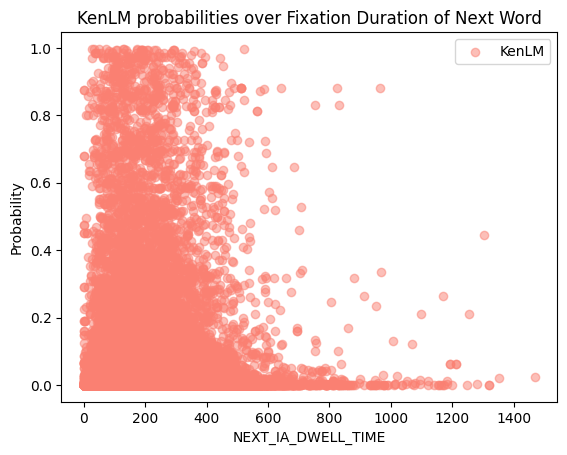

In [14]:
plt.scatter(avg_next_reading_time['NEXT_IA_DWELL_TIME'], avg_next_reading_time['kenlm_probs'], label='KenLM', color='salmon', alpha=0.5)
plt.xlabel('NEXT_IA_DWELL_TIME')
plt.ylabel('Probability')
plt.title('KenLM probabilities over Fixation Duration of Next Word')
plt.legend()
plt.show()

In [15]:
avg_next_reading_time = avg_next_reading_time.dropna(subset=['NEXT_IA_DWELL_TIME', 'pythia_probs', 'kenlm_probs'])

In [16]:
# Drop rows with NaN values in the relevant columns
avg_next_reading_time_cleaned = avg_next_reading_time.dropna(subset=['NEXT_IA_DWELL_TIME', 'pythia_probs'])

X = avg_next_reading_time_cleaned['NEXT_IA_DWELL_TIME']
Y = avg_next_reading_time_cleaned['pythia_probs']

pythia_model = sm.OLS(Y, X).fit()

In [17]:
X = avg_next_reading_time['NEXT_IA_DWELL_TIME']
Y = avg_next_reading_time['kenlm_probs']

kenlm_model = sm.OLS(Y, X).fit()

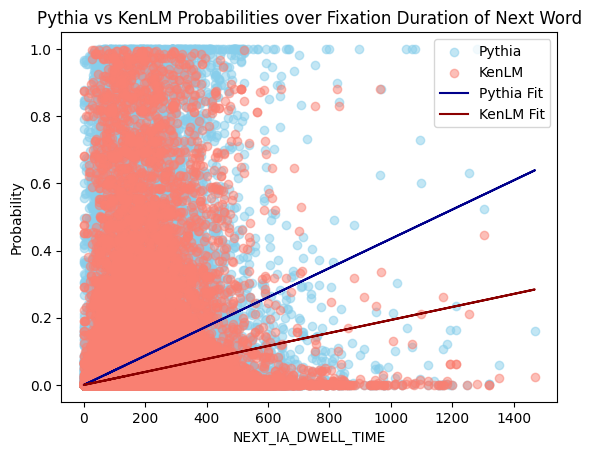

In [18]:
plt.scatter(avg_next_reading_time['NEXT_IA_DWELL_TIME'], avg_next_reading_time['pythia_probs'], label='Pythia', color='skyblue', alpha=0.5)
plt.scatter(avg_next_reading_time['NEXT_IA_DWELL_TIME'], avg_next_reading_time['kenlm_probs'], label='KenLM', color='salmon', alpha=0.5)

pythia_pred = pythia_model.predict(X)
kenlm_pred = kenlm_model.predict(X)

plt.plot(X.iloc[:, ].values, pythia_pred, color='darkblue', label='Pythia Fit')
plt.plot(X.iloc[:, ].values, kenlm_pred, color='darkred', label='KenLM Fit')

plt.title('Pythia vs KenLM Probabilities over Fixation Duration of Next Word')
plt.xlabel('NEXT_IA_DWELL_TIME')
plt.ylabel('Probability')
plt.legend()
plt.show()

                                 OLS Regression Results                                
Dep. Variable:       pythia_surprisal   R-squared (uncentered):                   0.450
Model:                            OLS   Adj. R-squared (uncentered):              0.450
Method:                 Least Squares   F-statistic:                          3.108e+04
Date:                Thu, 14 Aug 2025   Prob (F-statistic):                        0.00
Time:                        19:27:10   Log-Likelihood:                         -80668.
No. Observations:               37980   AIC:                                  1.613e+05
Df Residuals:                   37979   BIC:                                  1.613e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

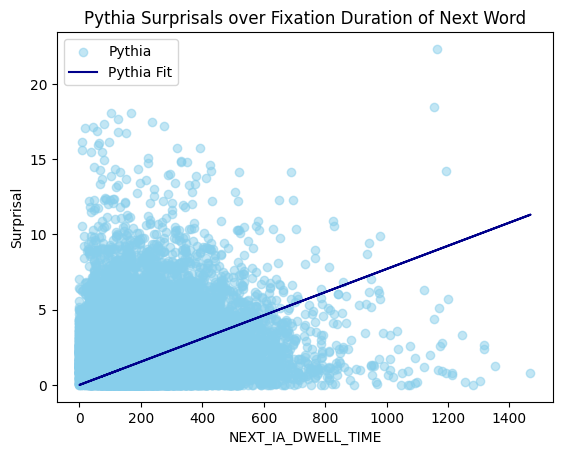

In [19]:
plt.scatter(avg_next_reading_time['NEXT_IA_DWELL_TIME'], avg_next_reading_time['pythia_surprisal'], label='Pythia', color='skyblue', alpha=0.5)
X = avg_next_reading_time['NEXT_IA_DWELL_TIME']
Y = avg_next_reading_time['pythia_surprisal']
pythia_model = sm.OLS(Y, X).fit()
print(pythia_model.summary())

preds = pythia_model.predict(X)
plt.plot(X.iloc[:, ].values, preds, color='darkblue', label='Pythia Fit')

plt.xlabel('NEXT_IA_DWELL_TIME')
plt.ylabel('Surprisal')
plt.legend()
plt.title('Pythia Surprisals over Fixation Duration of Next Word')
plt.show()

                                 OLS Regression Results                                
Dep. Variable:        kenlm_surprisal   R-squared (uncentered):                   0.477
Model:                            OLS   Adj. R-squared (uncentered):              0.477
Method:                 Least Squares   F-statistic:                          3.468e+04
Date:                Thu, 14 Aug 2025   Prob (F-statistic):                        0.00
Time:                        19:27:10   Log-Likelihood:                         -95110.
No. Observations:               37980   AIC:                                  1.902e+05
Df Residuals:                   37979   BIC:                                  1.902e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

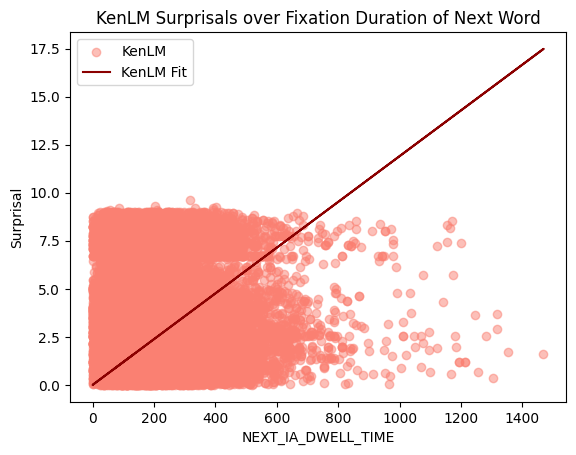

In [20]:
plt.scatter(avg_next_reading_time['NEXT_IA_DWELL_TIME'], avg_next_reading_time['kenlm_surprisal'], label='KenLM', color='salmon', alpha=0.5)
X = avg_next_reading_time['NEXT_IA_DWELL_TIME']
Y = avg_next_reading_time['kenlm_surprisal']
kenlm_model = sm.OLS(Y, X).fit()
print(kenlm_model.summary())

preds = kenlm_model.predict(X)
plt.plot(X.iloc[:, ].values, preds, color='darkred', label='KenLM Fit')

plt.xlabel('NEXT_IA_DWELL_TIME')
plt.ylabel('Surprisal')
plt.legend()
plt.title('KenLM Surprisals over Fixation Duration of Next Word')
plt.show()

### Task 2:

In [9]:
data_with_suprisals['pythia_probs'] = data_with_suprisals.apply(lambda row: pow(10, -row['pythia_surprisal']), axis=1)
data_with_suprisals['word_logfrequency'] = data_with_suprisals.apply(lambda row: math.log(row['wordfreq_frequency']), axis=1)

In [10]:
GAM_vars = data_with_suprisals[['article_batch', 'article_id', 'paragraph_id', 'IA_ID', 'difficulty_level',
                                'participant_id', 'IA_DWELL_TIME', 'NEXT_IA_DWELL_TIME', 'IA_FIRST_FIXATION_DURATION',
                                'IA_FIRST_RUN_DWELL_TIME', 'pythia_surprisal', 'pythia_probs', 'word_length_no_punctuation', 'word_logfrequency']]

In [11]:
GAM_vars.to_csv("/content/drive/MyDrive/language_and_cognition/GAM_vars.csv")

In [12]:
GAM_vars.head()

,article_batch,article_id,paragraph_id,IA_ID,difficulty_level,participant_id,IA_DWELL_TIME,NEXT_IA_DWELL_TIME,IA_FIRST_FIXATION_DURATION,IA_FIRST_RUN_DWELL_TIME,pythia_surprisal,pythia_probs,word_length_no_punctuation,word_logfrequency
0,2,0,1,1,Adv,l59_485,2171,876.0,311,1048,0.871920,0.134301,7,2.586840
1,2,0,1,2,Adv,l59_485,876,640.0,292,292,3.658067,0.000220,5,2.447627
2,2,0,1,3,Adv,l59_485,640,586.0,191,191,2.548094,0.002831,10,2.704692
3,2,0,1,4,Adv,l59_485,586,0.0,271,271,1.650895,0.022341,4,2.029046
4,2,0,1,5,Adv,l59_485,0,0.0,.,.,3.085254,0.000822,6,2.652165
